In [1]:
!pip install torch==2.2.1+cu121 torchvision==0.17.1+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!pip install torchvision
!pip install torchmetrics

Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html


In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Here I download FFmpeg, but I found out the problem is because the corrupted file
import os

ffmpeg_path = 'C:\\Program Files\\FFmpeg\\bin' 

os.environ['PATH'] += os.pathsep + ffmpeg_path

print(os.environ['PATH'])

C:\Users\ricky\anaconda3;C:\Users\ricky\anaconda3\Library\mingw-w64\bin;C:\Users\ricky\anaconda3\Library\usr\bin;C:\Users\ricky\anaconda3\Library\bin;C:\Users\ricky\anaconda3\Scripts;C:\Users\ricky\anaconda3\bin;C:\Users\ricky\anaconda3\condabin;C:\Users\ricky\anaconda3;C:\Users\ricky\anaconda3\Library\mingw-w64\bin;C:\Users\ricky\anaconda3\Library\usr\bin;C:\Users\ricky\anaconda3\Library\bin;C:\Users\ricky\anaconda3\Scripts;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\dotnet;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\System32\Wbem;C:\WINDOWS\System32\WindowsPowerShell\v1.0;C:\WINDOWS\System32\OpenSSH;C:\Users\ricky\AppData\Local\Microsoft\WindowsApps;C:\Program Files\FFMPEG\bin;.;C:\Program Files\FFmpeg\bin


In [4]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
import torch
from torch.utils.data import DataLoader, random_split

# Check and delete the corrupted files

In [9]:
import os
import librosa

#corrupted file let my model cant work
#find the corrupted files
def find_corrupted_files(directory):
    corrupted_files = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                _, _ = librosa.load(filepath, sr=None)
                print(f"Successfully loaded {filepath}")
            except Exception as e:
                print(f"Failed to load {filepath}: {e}")
                corrupted_files.append(filepath)
    return corrupted_files


audio_directory = 'genres_original'
corrupted_files = find_corrupted_files(audio_directory)

if corrupted_files:
    print("Corrupted files:")
    for filepath in corrupted_files:
        print(filepath)
else:
    print("No corrupted files found.")

Successfully loaded genres_original\blues\blues.00000.wav
Successfully loaded genres_original\blues\blues.00001.wav
Successfully loaded genres_original\blues\blues.00002.wav
Successfully loaded genres_original\blues\blues.00003.wav
Successfully loaded genres_original\blues\blues.00004.wav
Successfully loaded genres_original\blues\blues.00005.wav
Successfully loaded genres_original\blues\blues.00006.wav
Successfully loaded genres_original\blues\blues.00007.wav
Successfully loaded genres_original\blues\blues.00008.wav
Successfully loaded genres_original\blues\blues.00009.wav
Successfully loaded genres_original\blues\blues.00010.wav
Successfully loaded genres_original\blues\blues.00011.wav
Successfully loaded genres_original\blues\blues.00012.wav
Successfully loaded genres_original\blues\blues.00013.wav
Successfully loaded genres_original\blues\blues.00014.wav
Successfully loaded genres_original\blues\blues.00015.wav
Successfully loaded genres_original\blues\blues.00016.wav
Successfully l

C:\Users\ricky\AppData\Local\Temp\ipykernel_18548\2605882628.py:10: UserWarning: PySoundFile failed. Trying audioread instead.
  _, _ = librosa.load(filepath, sr=None)


Successfully loaded genres_original\jazz\jazz.00096.wav
Successfully loaded genres_original\jazz\jazz.00097.wav
Successfully loaded genres_original\jazz\jazz.00098.wav
Successfully loaded genres_original\jazz\jazz.00099.wav
Successfully loaded genres_original\metal\metal.00000.wav
Successfully loaded genres_original\metal\metal.00001.wav
Successfully loaded genres_original\metal\metal.00002.wav
Successfully loaded genres_original\metal\metal.00003.wav
Successfully loaded genres_original\metal\metal.00004.wav
Successfully loaded genres_original\metal\metal.00005.wav
Successfully loaded genres_original\metal\metal.00006.wav
Successfully loaded genres_original\metal\metal.00007.wav
Successfully loaded genres_original\metal\metal.00008.wav
Successfully loaded genres_original\metal\metal.00009.wav
Successfully loaded genres_original\metal\metal.00010.wav
Successfully loaded genres_original\metal\metal.00011.wav
Successfully loaded genres_original\metal\metal.00012.wav
Successfully loaded ge

In [10]:
#here I delete the corrupted file
#def to delete corrupted files

def delete_corrupted_files(directory):
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = os.path.join(subdir, file)
            try:
                _, _ = librosa.load(filepath, sr=None)
                print(f"Successfully loaded {filepath}")
            except Exception as e:
                print(f"Deleting corrupted file {filepath}: {e}")
                os.remove(filepath)

#path of audio files
audio_directory = 'genres_original'
delete_corrupted_files(audio_directory)

Successfully loaded genres_original\blues\blues.00000.wav
Successfully loaded genres_original\blues\blues.00001.wav
Successfully loaded genres_original\blues\blues.00002.wav
Successfully loaded genres_original\blues\blues.00003.wav
Successfully loaded genres_original\blues\blues.00004.wav
Successfully loaded genres_original\blues\blues.00005.wav
Successfully loaded genres_original\blues\blues.00006.wav
Successfully loaded genres_original\blues\blues.00007.wav
Successfully loaded genres_original\blues\blues.00008.wav
Successfully loaded genres_original\blues\blues.00009.wav
Successfully loaded genres_original\blues\blues.00010.wav
Successfully loaded genres_original\blues\blues.00011.wav
Successfully loaded genres_original\blues\blues.00012.wav
Successfully loaded genres_original\blues\blues.00013.wav
Successfully loaded genres_original\blues\blues.00014.wav
Successfully loaded genres_original\blues\blues.00015.wav
Successfully loaded genres_original\blues\blues.00016.wav
Successfully l

C:\Users\ricky\AppData\Local\Temp\ipykernel_18548\710421390.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  _, _ = librosa.load(filepath, sr=None)


Successfully loaded genres_original\metal\metal.00036.wav
Successfully loaded genres_original\metal\metal.00037.wav
Successfully loaded genres_original\metal\metal.00038.wav
Successfully loaded genres_original\metal\metal.00039.wav
Successfully loaded genres_original\metal\metal.00040.wav
Successfully loaded genres_original\metal\metal.00041.wav
Successfully loaded genres_original\metal\metal.00042.wav
Successfully loaded genres_original\metal\metal.00043.wav
Successfully loaded genres_original\metal\metal.00044.wav
Successfully loaded genres_original\metal\metal.00045.wav
Successfully loaded genres_original\metal\metal.00046.wav
Successfully loaded genres_original\metal\metal.00047.wav
Successfully loaded genres_original\metal\metal.00048.wav
Successfully loaded genres_original\metal\metal.00049.wav
Successfully loaded genres_original\metal\metal.00050.wav
Successfully loaded genres_original\metal\metal.00051.wav
Successfully loaded genres_original\metal\metal.00052.wav
Successfully l

# Check the Mel Look Like

Mel Spectrogram Dimensions:  (128, 1293)


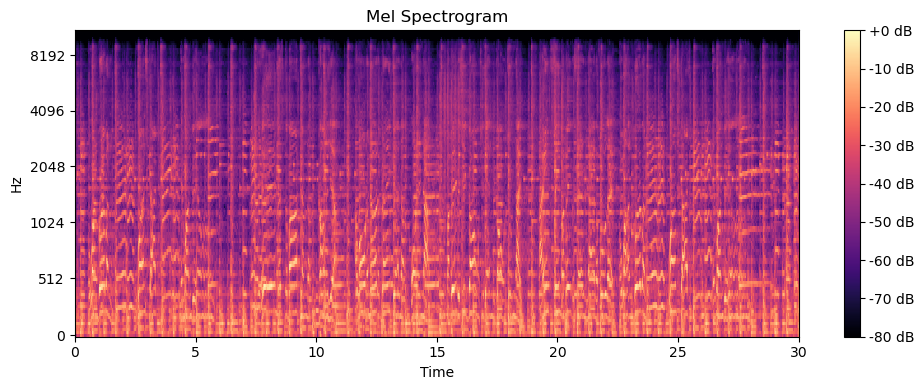

In [5]:
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
#load an audio file
audio_path = 'genres_original/blues/blues.00000.wav'
y, sr = librosa.load(audio_path)

#Generate one of Mel spectrogram
n_fft = 2048  #window size
hop_length = 512  #number of samples between successive frames
n_mels = 128  #number of Mel bands to generate

mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

#convert to dB
mel_spec_dB = librosa.power_to_db(mel_spec, ref=np.max)

#show the spectrogram dimensions, will use later
print("Mel Spectrogram Dimensions: ", mel_spec_dB.shape)

#Visualise Mel Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# Split Dataset and Data Charateristic

In [30]:
#to check the order of categories for confusion matrix
root_dir = 'genres_original'
music_categories = sorted(os.listdir(root_dir))
print(music_categories)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [5]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import LabelEncoder

#audio parameters
n_mels = 128
n_fft = 2048
hop_length = 512
max_pad_len = 174  #assume the longest MEL spectrogram has 174 frames

#label encoder
label_encoder = LabelEncoder()

#class dataset
class AudioDataset(Dataset):
    def __init__(self, audio_paths, labels, n_mels, n_fft, hop_length, max_pad_len):
        self.audio_paths = audio_paths
        self.labels = labels
        self.n_mels = n_mels
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.max_pad_len = max_pad_len

    def __len__(self):
        return len(self.audio_paths)

    def __getitem__(self, index):
        filepath = self.audio_paths[index]
        label = self.labels[index]
        audio, sample_rate = librosa.load(filepath, sr=None)
    
        #keyword arguments when calling melspectrogram
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=self.n_mels, n_fft=self.n_fft, hop_length=self.hop_length)
        mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    
        # MEL spectrogram -> fixed size
        pad_width = self.max_pad_len - mel_spec.shape[1]
        if pad_width > 0:
            mel_spec = np.pad(mel_spec, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mel_spec = mel_spec[:, :self.max_pad_len]
    
        #transfer to pytorch tensor and add a channel dimension to fit LSTM input
        mel_spec_tensor = torch.tensor(mel_spec).float().unsqueeze(0)  #(1, n_mels, max_pad_len)

        # Convert label to tensor
        label_tensor = torch.tensor(label).long()

        return mel_spec_tensor, label_tensor


#loading audio files and labels
def load_audio_files(root_dir):
    audio_paths = []
    labels = []
    genres = os.listdir(root_dir)
    for genre in genres:
        genre_path = os.path.join(root_dir, genre)
        for audio_file in os.listdir(genre_path):
            if audio_file.endswith('.wav'):
                audio_paths.append(os.path.join(genre_path, audio_file))
                labels.append(genre)
    return audio_paths, labels

#root directory path for audio files
root_dir = 'genres_original'
audio_paths, labels = load_audio_files(root_dir)

#encode labels
labels_encoded = label_encoder.fit_transform(labels)

#create dataset
audio_dataset = AudioDataset(audio_paths, labels_encoded, n_mels, n_fft, hop_length, max_pad_len)

#split dataset as cw require
train_size = int(0.7 * len(audio_dataset))
val_size = int(0.2 * len(audio_dataset))
test_size = len(audio_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(audio_dataset, [train_size, val_size, test_size])

#dataloader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [6]:
#show the number of training set
num_samples = len(train_loader.dataset)
print("Total number of samples in train_loader:", num_samples)

Total number of samples in train_loader: 699


In [7]:
#check mel shape(will use later
for mel_specs, _ in train_loader:
    print(mel_specs.shape)

torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([32, 1, 128, 174])
torch.Size([27, 1, 128, 174])


In [8]:
for features, labels in train_loader:
    print(features.shape, labels.shape)

torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([32, 1, 128, 174]) torch.Size([32])
torch.Size([2

# RNN+LSTM with original training set

In [171]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

#calss lstm

class MusicGenreLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(MusicGenreLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, 
                            num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        self.batch_norm = nn.BatchNorm1d(hidden_size)  #batch normalization
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(in_features=hidden_size, out_features=num_classes)
        self.relu = nn.ReLU()  #ReLU activation function

    def forward(self, x):
        x = x.squeeze(1).transpose(1, 2)  #input dimensions for LSTM
        _, (hn, _) = self.lstm(x)
        hn = self.relu(hn[-1, :, :])  #ReLU after LSTM
        hn = self.batch_norm(hn) #Apply batch normalization
        hn = self.dropout(hn)
        out = self.fc(hn)
        return out

#model
model = MusicGenreLSTM(input_size=128, hidden_size=256, num_layers=2, num_classes=10, dropout_rate=0.3).cuda()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00005) #best learning rate I tried

def calculate_accuracy(loader, model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    model.train()
    return accuracy

def train(model, train_loader, val_loader, epochs, loss_fn, optimizer):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            features, labels = features.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(features)
            loss = loss_fn(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            total_loss += loss.item()

      
        val_accuracy = calculate_accuracy(val_loader, model)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

train(model, train_loader, val_loader, epochs=120, loss_fn=loss_fn, optimizer=optimizer) #best epochs i tried

Epoch 1/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [1/120], Loss: 2.4810, Val Accuracy: 0.1357


Epoch 2/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [2/120], Loss: 2.2859, Val Accuracy: 0.2312


Epoch 3/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [3/120], Loss: 2.1912, Val Accuracy: 0.2462


Epoch 4/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [4/120], Loss: 2.0997, Val Accuracy: 0.2864


Epoch 5/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [5/120], Loss: 2.0643, Val Accuracy: 0.3065


Epoch 6/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [6/120], Loss: 2.0131, Val Accuracy: 0.3015


Epoch 7/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [7/120], Loss: 1.9606, Val Accuracy: 0.2965


Epoch 8/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [8/120], Loss: 1.9463, Val Accuracy: 0.2915


Epoch 9/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [9/120], Loss: 1.9153, Val Accuracy: 0.3015


Epoch 10/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [10/120], Loss: 1.8811, Val Accuracy: 0.3166


Epoch 11/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [11/120], Loss: 1.8498, Val Accuracy: 0.3166


Epoch 12/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [12/120], Loss: 1.8081, Val Accuracy: 0.3417


Epoch 13/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [13/120], Loss: 1.7635, Val Accuracy: 0.3367


Epoch 14/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [14/120], Loss: 1.7260, Val Accuracy: 0.3317


Epoch 15/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [15/120], Loss: 1.7011, Val Accuracy: 0.3668


Epoch 16/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [16/120], Loss: 1.6770, Val Accuracy: 0.3467


Epoch 17/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [17/120], Loss: 1.6744, Val Accuracy: 0.3417


Epoch 18/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [18/120], Loss: 1.6496, Val Accuracy: 0.3819


Epoch 19/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [19/120], Loss: 1.6361, Val Accuracy: 0.3869


Epoch 20/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [20/120], Loss: 1.6153, Val Accuracy: 0.3869


Epoch 21/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [21/120], Loss: 1.5729, Val Accuracy: 0.3668


Epoch 22/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [22/120], Loss: 1.5532, Val Accuracy: 0.3869


Epoch 23/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [23/120], Loss: 1.4837, Val Accuracy: 0.4070


Epoch 24/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [24/120], Loss: 1.4487, Val Accuracy: 0.3920


Epoch 25/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [25/120], Loss: 1.4747, Val Accuracy: 0.3769


Epoch 26/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [26/120], Loss: 1.4800, Val Accuracy: 0.4171


Epoch 27/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [27/120], Loss: 1.4638, Val Accuracy: 0.3819


Epoch 28/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [28/120], Loss: 1.4129, Val Accuracy: 0.4020


Epoch 29/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [29/120], Loss: 1.3967, Val Accuracy: 0.4271


Epoch 30/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [30/120], Loss: 1.3597, Val Accuracy: 0.4070


Epoch 31/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [31/120], Loss: 1.3708, Val Accuracy: 0.4422


Epoch 32/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [32/120], Loss: 1.3327, Val Accuracy: 0.4372


Epoch 33/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [33/120], Loss: 1.3076, Val Accuracy: 0.4121


Epoch 34/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [34/120], Loss: 1.2786, Val Accuracy: 0.4623


Epoch 35/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [35/120], Loss: 1.2572, Val Accuracy: 0.4422


Epoch 36/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [36/120], Loss: 1.2251, Val Accuracy: 0.4221


Epoch 37/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [37/120], Loss: 1.2131, Val Accuracy: 0.4774


Epoch 38/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [38/120], Loss: 1.1850, Val Accuracy: 0.4573


Epoch 39/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [39/120], Loss: 1.1737, Val Accuracy: 0.4020


Epoch 40/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [40/120], Loss: 1.1461, Val Accuracy: 0.4422


Epoch 41/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [41/120], Loss: 1.1226, Val Accuracy: 0.4623


Epoch 42/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [42/120], Loss: 1.1224, Val Accuracy: 0.4724


Epoch 43/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [43/120], Loss: 1.0904, Val Accuracy: 0.4774


Epoch 44/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [44/120], Loss: 1.0634, Val Accuracy: 0.4874


Epoch 45/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [45/120], Loss: 1.0219, Val Accuracy: 0.4874


Epoch 46/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [46/120], Loss: 1.0170, Val Accuracy: 0.4673


Epoch 47/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [47/120], Loss: 0.9799, Val Accuracy: 0.4874


Epoch 48/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [48/120], Loss: 0.9429, Val Accuracy: 0.4975


Epoch 49/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [49/120], Loss: 0.9279, Val Accuracy: 0.4724


Epoch 50/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [50/120], Loss: 0.8990, Val Accuracy: 0.4774


Epoch 51/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [51/120], Loss: 0.8975, Val Accuracy: 0.4372


Epoch 52/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [52/120], Loss: 0.8563, Val Accuracy: 0.4874


Epoch 53/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [53/120], Loss: 0.8579, Val Accuracy: 0.4724


Epoch 54/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [54/120], Loss: 0.8019, Val Accuracy: 0.4874


Epoch 55/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [55/120], Loss: 0.7993, Val Accuracy: 0.4472


Epoch 56/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [56/120], Loss: 0.8158, Val Accuracy: 0.4824


Epoch 57/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [57/120], Loss: 0.7842, Val Accuracy: 0.4874


Epoch 58/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [58/120], Loss: 0.7935, Val Accuracy: 0.5025


Epoch 59/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [59/120], Loss: 0.7957, Val Accuracy: 0.4925


Epoch 60/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [60/120], Loss: 0.7422, Val Accuracy: 0.4774


Epoch 61/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [61/120], Loss: 0.7211, Val Accuracy: 0.4774


Epoch 62/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [62/120], Loss: 0.7286, Val Accuracy: 0.4623


Epoch 63/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [63/120], Loss: 0.7405, Val Accuracy: 0.4774


Epoch 64/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [64/120], Loss: 0.6752, Val Accuracy: 0.4824


Epoch 65/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [65/120], Loss: 0.7266, Val Accuracy: 0.4623


Epoch 66/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [66/120], Loss: 0.6835, Val Accuracy: 0.4774


Epoch 67/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [67/120], Loss: 0.6210, Val Accuracy: 0.4975


Epoch 68/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [68/120], Loss: 0.6348, Val Accuracy: 0.4824


Epoch 69/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [69/120], Loss: 0.5982, Val Accuracy: 0.4673


Epoch 70/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [70/120], Loss: 0.6315, Val Accuracy: 0.4724


Epoch 71/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [71/120], Loss: 0.5956, Val Accuracy: 0.4623


Epoch 72/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [72/120], Loss: 0.6479, Val Accuracy: 0.4724


Epoch 73/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [73/120], Loss: 0.5899, Val Accuracy: 0.5075


Epoch 74/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [74/120], Loss: 0.5773, Val Accuracy: 0.4975


Epoch 75/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [75/120], Loss: 0.5427, Val Accuracy: 0.5276


Epoch 76/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [76/120], Loss: 0.5310, Val Accuracy: 0.4925


Epoch 77/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [77/120], Loss: 0.5149, Val Accuracy: 0.5025


Epoch 78/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [78/120], Loss: 0.4939, Val Accuracy: 0.5276


Epoch 79/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [79/120], Loss: 0.5001, Val Accuracy: 0.4925


Epoch 80/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [80/120], Loss: 0.5040, Val Accuracy: 0.4874


Epoch 81/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [81/120], Loss: 0.4514, Val Accuracy: 0.5176


Epoch 82/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [82/120], Loss: 0.4314, Val Accuracy: 0.4824


Epoch 83/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [83/120], Loss: 0.4580, Val Accuracy: 0.5327


Epoch 84/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [84/120], Loss: 0.4153, Val Accuracy: 0.4874


Epoch 85/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [85/120], Loss: 0.4037, Val Accuracy: 0.4874


Epoch 86/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [86/120], Loss: 0.4290, Val Accuracy: 0.4724


Epoch 87/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [87/120], Loss: 0.3930, Val Accuracy: 0.4673


Epoch 88/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [88/120], Loss: 0.4169, Val Accuracy: 0.4523


Epoch 89/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [89/120], Loss: 0.4391, Val Accuracy: 0.5025


Epoch 90/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [90/120], Loss: 0.3893, Val Accuracy: 0.5176


Epoch 91/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [91/120], Loss: 0.4203, Val Accuracy: 0.4874


Epoch 92/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [92/120], Loss: 0.4204, Val Accuracy: 0.4975


Epoch 93/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [93/120], Loss: 0.3823, Val Accuracy: 0.4724


Epoch 94/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [94/120], Loss: 0.3754, Val Accuracy: 0.4724


Epoch 95/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [95/120], Loss: 0.3644, Val Accuracy: 0.4925


Epoch 96/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [96/120], Loss: 0.3766, Val Accuracy: 0.5226


Epoch 97/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [97/120], Loss: 0.3580, Val Accuracy: 0.4673


Epoch 98/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [98/120], Loss: 0.3522, Val Accuracy: 0.4874


Epoch 99/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [99/120], Loss: 0.3533, Val Accuracy: 0.4874


Epoch 100/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [100/120], Loss: 0.3352, Val Accuracy: 0.4975


Epoch 101/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [101/120], Loss: 0.3194, Val Accuracy: 0.5075


Epoch 102/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [102/120], Loss: 0.3088, Val Accuracy: 0.4824


Epoch 103/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [103/120], Loss: 0.3195, Val Accuracy: 0.4874


Epoch 104/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [104/120], Loss: 0.2727, Val Accuracy: 0.4824


Epoch 105/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [105/120], Loss: 0.2844, Val Accuracy: 0.4925


Epoch 106/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [106/120], Loss: 0.3035, Val Accuracy: 0.4975


Epoch 107/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [107/120], Loss: 0.2863, Val Accuracy: 0.4422


Epoch 108/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [108/120], Loss: 0.2424, Val Accuracy: 0.4623


Epoch 109/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [109/120], Loss: 0.2664, Val Accuracy: 0.4874


Epoch 110/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [110/120], Loss: 0.2653, Val Accuracy: 0.5025


Epoch 111/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [111/120], Loss: 0.2714, Val Accuracy: 0.4774


Epoch 112/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [112/120], Loss: 0.2658, Val Accuracy: 0.4925


Epoch 113/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [113/120], Loss: 0.2619, Val Accuracy: 0.4925


Epoch 114/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [114/120], Loss: 0.2533, Val Accuracy: 0.5075


Epoch 115/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [115/120], Loss: 0.2551, Val Accuracy: 0.4472


Epoch 116/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [116/120], Loss: 0.2673, Val Accuracy: 0.4975


Epoch 117/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [117/120], Loss: 0.2524, Val Accuracy: 0.4472


Epoch 118/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [118/120], Loss: 0.2482, Val Accuracy: 0.4774


Epoch 119/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [119/120], Loss: 0.2368, Val Accuracy: 0.5226


Epoch 120/120:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [120/120], Loss: 0.1872, Val Accuracy: 0.4774


In [172]:
def test_model(model, test_loader):
    model.eval()  #evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = correct / total
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy


test_accuracy = test_model(model, test_loader)

Test Accuracy: 0.5248


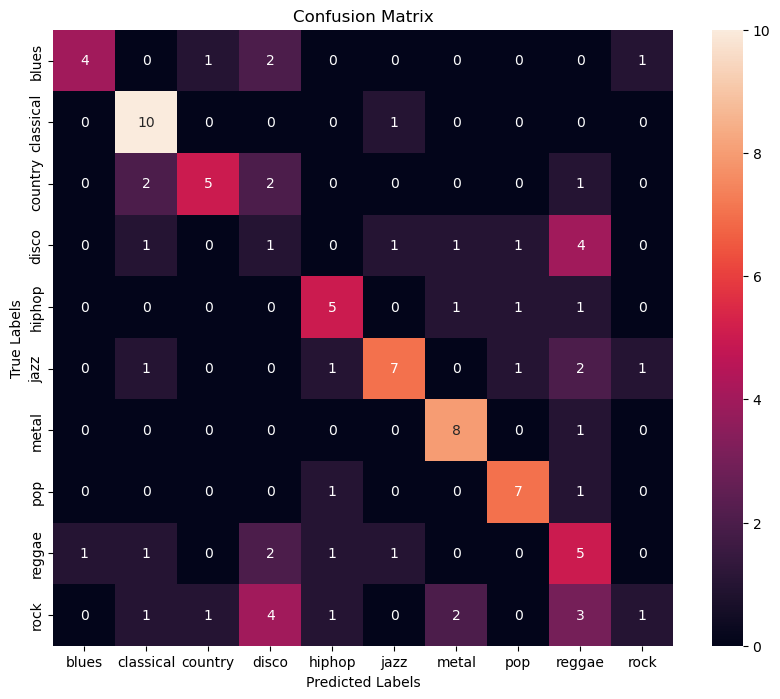

In [173]:
from torchmetrics import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns

def get_confusion_matrix(model, loader, num_classes):
    model.eval()
    #multiclass classification
    confusion_matrix = ConfusionMatrix(num_classes=num_classes, task='multiclass')
    confusion_matrix = confusion_matrix.to('cuda') 
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            confusion_matrix.update(preds, labels)
    cm = confusion_matrix.compute()
    return cm.cpu().numpy()  #for easy use with seaborn


num_classes = 10 
model.cuda()  

#confusion matrix
conf_matrix = get_confusion_matrix(model, test_loader, num_classes)

#plot the confusion matrix
plt.figure(figsize=(10, 8))
music_categories = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=music_categories, yticklabels=music_categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# MEL + MFCCS (Bad Result so Give up)

In [11]:
#import numpy as np
#import torch
#from torch.utils.data import Dataset, DataLoader, random_split
#import librosa
#from sklearn.preprocessing import LabelEncoder

#class AudioDataset(Dataset):
    #def __init__(self, audio_paths, labels, n_mels, n_mfcc, n_fft, hop_length, max_pad_len):
        #self.audio_paths = audio_paths
        #self.labels = labels
        #self.n_mels = n_mels
        #self.n_mfcc = n_mfcc
        #self.n_fft = n_fft
        #self.hop_length = hop_length
        #self.max_pad_len = max_pad_len

    #def __len__(self):
        #return len(self.audio_paths)

    #def __getitem__(self, index):
        #filepath = self.audio_paths[index]
        #label = self.labels[index]
        #audio, sample_rate = librosa.load(filepath, sr=None)
        
        # Compute Mel spectrogram and MFCC
        #mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=self.n_fft,
                                                  #hop_length=self.hop_length, n_mels=self.n_mels)
        #mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
        #mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=self.n_mfcc,
                                    #n_fft=self.n_fft, hop_length=self.hop_length)

        # Normalize features
        #mel_spec = librosa.util.normalize(mel_spec)
        #mfcc = librosa.util.normalize(mfcc)

        # Pad or truncate the features to a fixed size
        #if mel_spec.shape[1] < self.max_pad_len:
            #mel_pad_width = self.max_pad_len - mel_spec.shape[1]
            #mel_spec = np.pad(mel_spec, ((0, 0), (0, mel_pad_width)), mode='constant')
        #else:
            #mel_spec = mel_spec[:, :self.max_pad_len]

        #if mfcc.shape[1] < self.max_pad_len:
            #mfcc_pad_width = self.max_pad_len - mfcc.shape[1]
            #mfcc = np.pad(mfcc, ((0, 0), (0, mfcc_pad_width)), mode='constant')
        #else:
            #mfcc = mfcc[:, :self.max_pad_len]

        # Stack Mel spectrogram and MFCC (as new channels)
        #combined_features = np.vstack([mel_spec, mfcc])
        #combined_features_tensor = torch.tensor(combined_features).float().unsqueeze(0)  # Add channel dimension

        #label_tensor = torch.tensor(label).long()
        #return combined_features_tensor, label_tensor

# Assuming audio_paths and labels are loaded correctly
#root_dir = 'genres_original'
#audio_paths, labels = load_audio_files(root_dir)  # make sure load_audio_files is defined correctly
#labels_encoded = LabelEncoder().fit_transform(labels)

# Create dataset
#audio_dataset = AudioDataset(audio_paths, labels_encoded, n_mels=128, n_mfcc=20, n_fft=2048, hop_length=512, max_pad_len=174)
#train_size = int(0.7 * len(audio_dataset))
#val_size = int(0.2 * len(audio_dataset))
#test_size = len(audio_dataset) - train_size - val_size
#train_dataset, val_dataset, test_dataset = random_split(audio_dataset, [train_size, val_size, test_size])

# DataLoaders
#train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
#test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [21]:
#import torch
#import torch.nn as nn
#import torch.optim as optim
#from torch.utils.data import DataLoader
#from tqdm.auto import tqdm

#class MusicGenreLSTM(nn.Module):
    #def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        #super(MusicGenreLSTM, self).__init__()
        #self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            #num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        #self.dropout = nn.Dropout(dropout_rate)
        #self.fc = nn.Linear(in_features=hidden_size, out_features=num_classes)

    #def forward(self, x):
        #x = x.squeeze(1).transpose(1, 2)  # Adjusting the input dimensions for LSTM
        #self.lstm.flatten_parameters()  # Ensure contiguous memory layout for performance
        #_, (hn, _) = self.lstm(x)
        #out = self.dropout(hn[-1, :, :])  # Using the last hidden state
        #out = self.fc(out)
        #return out


# Initialize the model with the specified dropout rate and move to the correct device
#model = MusicGenreLSTM(input_size=148, hidden_size=256, num_layers=2, num_classes=10, dropout_rate=0.3).cuda()

#loss_fn = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.00001)

# Ensure you have defined your training and validation DataLoaders: train_loader and val_loader

#def calculate_accuracy(loader, model):
    #model.eval()
    #correct = 0
    #total = 0
    #with torch.no_grad():
        #for features, labels in loader:
            #features, labels = features.cuda(), labels.cuda()
            #outputs = model(features)
            #_, predicted = torch.max(outputs.data, 1)
            #total += labels.size(0)
            #correct += (predicted == labels).sum().item()
    #accuracy = correct / total
    #model.train()
    #return accuracy

#def train(model, train_loader, val_loader, epochs, loss_fn, optimizer):
    #for epoch in range(epochs):
        #model.train()
        #total_loss = 0
        #for features, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):
            #features, labels = features.cuda(), labels.cuda()
            #optimizer.zero_grad()
            #outputs = model(features)
            #loss = loss_fn(outputs, labels)
            #loss.backward()
            #optimizer.step()
            #total_loss += loss.item()

        #avg_loss = total_loss / len(train_loader)

        # Validation phase
        #validation_loss = 0.0
        #for features, labels in val_loader:
            #features, labels = features.cuda(), labels.cuda()
            #outputs = model(features)
            #loss = loss_fn(outputs, labels)
            #validation_loss += loss.item()
        #validation_loss /= len(val_loader)
        #val_accuracy = calculate_accuracy(val_loader, model)
        
        #print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}, Val Loss: {validation_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
        
        

# Assuming enhanced_data_loader and val_loader are defined and loaded with your dataset
#train(model, train_loader, val_loader, epochs=100, loss_fn=loss_fn, optimizer=optimizer)

Epoch 1/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [1/100], Loss: 2.3009, Val Loss: 2.3018, Val Accuracy: 0.0905


Epoch 2/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [2/100], Loss: 2.3020, Val Loss: 2.3065, Val Accuracy: 0.0905


Epoch 3/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [3/100], Loss: 2.2993, Val Loss: 2.3049, Val Accuracy: 0.0905


Epoch 4/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [4/100], Loss: 2.2997, Val Loss: 2.3074, Val Accuracy: 0.0905


Epoch 5/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [5/100], Loss: 2.2988, Val Loss: 2.2993, Val Accuracy: 0.0905


Epoch 6/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [6/100], Loss: 2.2976, Val Loss: 2.3042, Val Accuracy: 0.0905


Epoch 7/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [7/100], Loss: 2.2978, Val Loss: 2.2991, Val Accuracy: 0.0905


Epoch 8/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [8/100], Loss: 2.2966, Val Loss: 2.2987, Val Accuracy: 0.0955


Epoch 9/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [9/100], Loss: 2.2944, Val Loss: 2.3016, Val Accuracy: 0.1206


Epoch 10/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [10/100], Loss: 2.2928, Val Loss: 2.2940, Val Accuracy: 0.1457


Epoch 11/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [11/100], Loss: 2.2910, Val Loss: 2.2915, Val Accuracy: 0.1508


Epoch 12/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [12/100], Loss: 2.2911, Val Loss: 2.2982, Val Accuracy: 0.1407


Epoch 13/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [13/100], Loss: 2.2883, Val Loss: 2.2917, Val Accuracy: 0.1357


Epoch 14/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [14/100], Loss: 2.2861, Val Loss: 2.2952, Val Accuracy: 0.1256


Epoch 15/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [15/100], Loss: 2.2858, Val Loss: 2.2886, Val Accuracy: 0.1156


Epoch 16/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [16/100], Loss: 2.2824, Val Loss: 2.2874, Val Accuracy: 0.1106


Epoch 17/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [17/100], Loss: 2.2787, Val Loss: 2.2952, Val Accuracy: 0.1005


Epoch 18/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [18/100], Loss: 2.2774, Val Loss: 2.2780, Val Accuracy: 0.1005


Epoch 19/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [19/100], Loss: 2.2709, Val Loss: 2.2790, Val Accuracy: 0.0955


Epoch 20/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [20/100], Loss: 2.2693, Val Loss: 2.2733, Val Accuracy: 0.0905


Epoch 21/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [21/100], Loss: 2.2610, Val Loss: 2.2699, Val Accuracy: 0.0905


Epoch 22/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [22/100], Loss: 2.2533, Val Loss: 2.2594, Val Accuracy: 0.1005


Epoch 23/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [23/100], Loss: 2.2443, Val Loss: 2.2418, Val Accuracy: 0.1005


Epoch 24/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [24/100], Loss: 2.2346, Val Loss: 2.2509, Val Accuracy: 0.1256


Epoch 25/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [25/100], Loss: 2.2208, Val Loss: 2.2123, Val Accuracy: 0.2010


Epoch 26/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [26/100], Loss: 2.2060, Val Loss: 2.2261, Val Accuracy: 0.2111


Epoch 27/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [27/100], Loss: 2.1852, Val Loss: 2.2166, Val Accuracy: 0.2010


Epoch 28/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [28/100], Loss: 2.1707, Val Loss: 2.1995, Val Accuracy: 0.2211


Epoch 29/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [29/100], Loss: 2.1531, Val Loss: 2.1621, Val Accuracy: 0.2412


Epoch 30/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [30/100], Loss: 2.1306, Val Loss: 2.1539, Val Accuracy: 0.2462


Epoch 31/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [31/100], Loss: 2.1259, Val Loss: 2.1333, Val Accuracy: 0.2362


Epoch 32/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [32/100], Loss: 2.0947, Val Loss: 2.1352, Val Accuracy: 0.2714


Epoch 33/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [33/100], Loss: 2.0843, Val Loss: 2.1033, Val Accuracy: 0.2462


Epoch 34/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [34/100], Loss: 2.0547, Val Loss: 2.1131, Val Accuracy: 0.2563


Epoch 35/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [35/100], Loss: 2.0416, Val Loss: 2.0757, Val Accuracy: 0.2613


Epoch 36/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [36/100], Loss: 2.0119, Val Loss: 2.0100, Val Accuracy: 0.2864


Epoch 37/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [37/100], Loss: 1.9858, Val Loss: 2.0608, Val Accuracy: 0.3015


Epoch 38/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [38/100], Loss: 1.9614, Val Loss: 2.0456, Val Accuracy: 0.2965


Epoch 39/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [39/100], Loss: 1.9404, Val Loss: 2.0198, Val Accuracy: 0.3065


Epoch 40/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [40/100], Loss: 1.9192, Val Loss: 2.0069, Val Accuracy: 0.3015


Epoch 41/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [41/100], Loss: 1.9995, Val Loss: 2.0586, Val Accuracy: 0.2814


Epoch 42/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [42/100], Loss: 1.9458, Val Loss: 2.0140, Val Accuracy: 0.2814


Epoch 43/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [43/100], Loss: 1.9170, Val Loss: 2.0028, Val Accuracy: 0.3065


Epoch 44/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [44/100], Loss: 1.9054, Val Loss: 1.9071, Val Accuracy: 0.3166


Epoch 45/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [45/100], Loss: 1.8758, Val Loss: 1.9249, Val Accuracy: 0.2915


Epoch 46/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [46/100], Loss: 1.8603, Val Loss: 1.9457, Val Accuracy: 0.2814


Epoch 47/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [47/100], Loss: 1.8454, Val Loss: 1.9358, Val Accuracy: 0.3317


Epoch 48/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [48/100], Loss: 1.8353, Val Loss: 1.9659, Val Accuracy: 0.3367


Epoch 49/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [49/100], Loss: 1.8245, Val Loss: 1.9080, Val Accuracy: 0.3065


Epoch 50/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [50/100], Loss: 1.8057, Val Loss: 1.9064, Val Accuracy: 0.2965


Epoch 51/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [51/100], Loss: 1.7978, Val Loss: 1.8978, Val Accuracy: 0.3266


Epoch 52/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [52/100], Loss: 1.8855, Val Loss: 1.9322, Val Accuracy: 0.3367


Epoch 53/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [53/100], Loss: 1.8581, Val Loss: 1.9029, Val Accuracy: 0.3015


Epoch 54/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [54/100], Loss: 1.8683, Val Loss: 1.8776, Val Accuracy: 0.3216


Epoch 55/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [55/100], Loss: 1.8374, Val Loss: 1.8697, Val Accuracy: 0.3116


Epoch 56/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [56/100], Loss: 1.8142, Val Loss: 1.8276, Val Accuracy: 0.3317


Epoch 57/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [57/100], Loss: 1.7922, Val Loss: 1.8799, Val Accuracy: 0.3266


Epoch 58/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [58/100], Loss: 1.7987, Val Loss: 1.9209, Val Accuracy: 0.3015


Epoch 59/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [59/100], Loss: 1.7883, Val Loss: 1.9016, Val Accuracy: 0.3015


Epoch 60/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [60/100], Loss: 1.7667, Val Loss: 1.8499, Val Accuracy: 0.3116


Epoch 61/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [61/100], Loss: 1.7710, Val Loss: 1.8139, Val Accuracy: 0.3417


Epoch 62/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [62/100], Loss: 1.7565, Val Loss: 1.8156, Val Accuracy: 0.3065


Epoch 63/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [63/100], Loss: 1.7324, Val Loss: 1.8748, Val Accuracy: 0.3015


Epoch 64/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [64/100], Loss: 1.7367, Val Loss: 1.8214, Val Accuracy: 0.3216


Epoch 65/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [65/100], Loss: 1.7221, Val Loss: 1.7859, Val Accuracy: 0.3166


Epoch 66/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [66/100], Loss: 1.7194, Val Loss: 1.8121, Val Accuracy: 0.3266


Epoch 67/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [67/100], Loss: 1.7257, Val Loss: 1.8072, Val Accuracy: 0.3618


Epoch 68/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [68/100], Loss: 1.6949, Val Loss: 1.8369, Val Accuracy: 0.3266


Epoch 69/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [69/100], Loss: 1.7140, Val Loss: 1.8408, Val Accuracy: 0.3216


Epoch 70/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [70/100], Loss: 1.6855, Val Loss: 1.7370, Val Accuracy: 0.3518


Epoch 71/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [71/100], Loss: 1.6953, Val Loss: 1.7275, Val Accuracy: 0.3317


Epoch 72/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [72/100], Loss: 1.7210, Val Loss: 1.8492, Val Accuracy: 0.3116


Epoch 73/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [73/100], Loss: 1.6749, Val Loss: 1.8388, Val Accuracy: 0.2764


Epoch 74/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [74/100], Loss: 1.6749, Val Loss: 1.7553, Val Accuracy: 0.3065


Epoch 75/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [75/100], Loss: 1.6747, Val Loss: 1.7882, Val Accuracy: 0.3266


Epoch 76/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [76/100], Loss: 1.6649, Val Loss: 1.7513, Val Accuracy: 0.3317


Epoch 77/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [77/100], Loss: 1.6510, Val Loss: 1.8098, Val Accuracy: 0.3266


Epoch 78/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [78/100], Loss: 1.6254, Val Loss: 1.8251, Val Accuracy: 0.3166


Epoch 79/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [79/100], Loss: 1.6446, Val Loss: 1.7437, Val Accuracy: 0.3367


Epoch 80/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [80/100], Loss: 1.6692, Val Loss: 1.7515, Val Accuracy: 0.3417


Epoch 81/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [81/100], Loss: 1.6264, Val Loss: 1.7569, Val Accuracy: 0.3367


Epoch 82/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [82/100], Loss: 1.6398, Val Loss: 1.7571, Val Accuracy: 0.3417


Epoch 83/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [83/100], Loss: 1.6439, Val Loss: 1.8047, Val Accuracy: 0.2965


Epoch 84/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [84/100], Loss: 1.6423, Val Loss: 1.7150, Val Accuracy: 0.3618


Epoch 85/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [85/100], Loss: 1.6195, Val Loss: 1.7835, Val Accuracy: 0.3367


Epoch 86/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [86/100], Loss: 1.6319, Val Loss: 1.7708, Val Accuracy: 0.3467


Epoch 87/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [87/100], Loss: 1.6071, Val Loss: 1.7963, Val Accuracy: 0.3467


Epoch 88/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [88/100], Loss: 1.6067, Val Loss: 1.7646, Val Accuracy: 0.3518


Epoch 89/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [89/100], Loss: 1.6184, Val Loss: 1.7940, Val Accuracy: 0.3719


Epoch 90/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [90/100], Loss: 1.6112, Val Loss: 1.7851, Val Accuracy: 0.3668


Epoch 91/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [91/100], Loss: 1.6010, Val Loss: 1.7321, Val Accuracy: 0.3417


Epoch 92/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [92/100], Loss: 1.5970, Val Loss: 1.8296, Val Accuracy: 0.3467


Epoch 93/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [93/100], Loss: 1.9426, Val Loss: 1.8510, Val Accuracy: 0.3467


Epoch 94/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [94/100], Loss: 1.7172, Val Loss: 1.8369, Val Accuracy: 0.3467


Epoch 95/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [95/100], Loss: 1.6325, Val Loss: 1.8822, Val Accuracy: 0.3317


Epoch 96/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [96/100], Loss: 1.6413, Val Loss: 1.8436, Val Accuracy: 0.3166


Epoch 97/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [97/100], Loss: 1.5941, Val Loss: 1.7525, Val Accuracy: 0.3266


Epoch 98/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [98/100], Loss: 1.5841, Val Loss: 1.7819, Val Accuracy: 0.3266


Epoch 99/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [99/100], Loss: 1.5815, Val Loss: 1.7632, Val Accuracy: 0.3015


Epoch 100/100:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch [100/100], Loss: 1.5862, Val Loss: 1.7870, Val Accuracy: 0.3317


In [22]:
#def test_model(model, test_loader):
    #model.eval()  # 設置模型為評估模式
    #correct = 0
    #total = 0
    #with torch.no_grad():
        #for features, labels in test_loader:
            #features, labels = features.cuda(), labels.cuda()
            #outputs = model(features)
            #_, predicted = torch.max(outputs.data, 1)
            #total += labels.size(0)
            #correct += (predicted == labels).sum().item()
    #test_accuracy = correct / total
    #print(f'Test Accuracy: {test_accuracy:.4f}')
    #return test_accuracy


#test_accuracy = test_model(model, test_loader)

Test Accuracy: 0.4059


# Gan generate data

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import os
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

#Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim=22272):  #output_dim suitable to [1, 128, 174]
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.BatchNorm1d(256),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.BatchNorm1d(512),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.BatchNorm1d(1024),
            nn.Linear(1024, output_dim),
            nn.Tanh()  #Tanh is used to get the output in a range [-1, 1]
        )

    def forward(self, z):
        x = self.fc(z)
        return x.view(-1, 1, 128, 174)  #reshape to [batch size, 1, 128, 174]
    
#Discriminator Architecture
class Discriminator(nn.Module):
    def __init__(self, input_dim=22272):  #flatten input
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  #make sure input is flatten
        return self.fc(x)

def train_gan(generator, discriminator, data_loader, z_dim, epochs=50):
    generator.cuda()
    discriminator.cuda()

    g_optimizer = optim.Adam(generator.parameters(), lr=0.00008)
    d_optimizer = optim.Adam(discriminator.parameters(), lr=0.00005) #try to find the best learning rate
    criterion = nn.BCELoss()

    real_label = 1
    fake_label = 0

    for epoch in tqdm(range(epochs), desc='Epochs'):
        for i, (mel_specs, _) in enumerate(tqdm(data_loader, desc='Batches', leave=False)):
            mel_specs = mel_specs.cuda()
            b_size = mel_specs.size(0)

            #update discriminator: max log(D(x)) + log(1 - D(G(z)))
            d_optimizer.zero_grad()
            real_labels = torch.full((b_size,), real_label, dtype=torch.float).cuda()
            output = discriminator(mel_specs).view(-1)
            errD_real = criterion(output, real_labels)
            errD_real.backward()

            noise = torch.randn(b_size, z_dim).cuda()
            fake = generator(noise)
            fake_labels = torch.full((b_size,), fake_label, dtype=torch.float).cuda()
            output = discriminator(fake.detach()).view(-1)
            errD_fake = criterion(output, fake_labels)
            errD_fake.backward()
            errD = errD_real + errD_fake
            d_optimizer.step()

            #update generator: max log(D(G(z)))
            g_optimizer.zero_grad()
            output = discriminator(fake).view(-1)
            errG = criterion(output, real_labels)
            errG.backward()
            g_optimizer.step()

            if i % 50 == 0:
                print(f'[{epoch+1}/{epochs}][{i+1}/{len(data_loader)}] Loss_D: {errD:.4f} Loss_G: {errG:.4f}')
#defined z_dim and output_dim
output_dim = 22272
z_dim = 150 
generator = Generator(z_dim, output_dim)
discriminator = Discriminator(output_dim).cuda()

#Train the GAN
train_gan(generator, discriminator, train_loader, z_dim, epochs=50)

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[1/50][1/22] Loss_D: 3.9216 Loss_G: 0.6363


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[2/50][1/22] Loss_D: 0.7876 Loss_G: 0.6013


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[3/50][1/22] Loss_D: 0.8240 Loss_G: 0.5827


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[4/50][1/22] Loss_D: 0.8231 Loss_G: 0.5682


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[5/50][1/22] Loss_D: 1.2005 Loss_G: 0.5887


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[6/50][1/22] Loss_D: 0.8452 Loss_G: 0.5504


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[7/50][1/22] Loss_D: 0.8245 Loss_G: 0.5901


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[8/50][1/22] Loss_D: 0.8421 Loss_G: 0.5911


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[9/50][1/22] Loss_D: 0.7753 Loss_G: 0.6242


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[10/50][1/22] Loss_D: 0.6761 Loss_G: 0.7587


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[11/50][1/22] Loss_D: 0.7702 Loss_G: 0.6595


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[12/50][1/22] Loss_D: 0.7277 Loss_G: 0.7011


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[13/50][1/22] Loss_D: 0.7188 Loss_G: 0.6771


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[14/50][1/22] Loss_D: 0.7068 Loss_G: 0.6903


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[15/50][1/22] Loss_D: 0.6748 Loss_G: 0.7525


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[16/50][1/22] Loss_D: 1.0517 Loss_G: 0.4536


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[17/50][1/22] Loss_D: 0.9585 Loss_G: 0.5322


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[18/50][1/22] Loss_D: 0.9603 Loss_G: 0.5232


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[19/50][1/22] Loss_D: 0.9681 Loss_G: 0.4996


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[20/50][1/22] Loss_D: 0.8496 Loss_G: 0.5663


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[21/50][1/22] Loss_D: 1.0396 Loss_G: 0.4298


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[22/50][1/22] Loss_D: 0.8689 Loss_G: 0.6145


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[23/50][1/22] Loss_D: 1.2362 Loss_G: 0.3468


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[24/50][1/22] Loss_D: 0.8605 Loss_G: 0.5606


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[25/50][1/22] Loss_D: 1.0413 Loss_G: 0.4805


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[26/50][1/22] Loss_D: 1.3287 Loss_G: 0.3306


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[27/50][1/22] Loss_D: 2.5528 Loss_G: 0.5148


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[28/50][1/22] Loss_D: 1.5056 Loss_G: 0.2703


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[29/50][1/22] Loss_D: 0.8406 Loss_G: 0.5089


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[30/50][1/22] Loss_D: 1.0517 Loss_G: 0.4149


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[31/50][1/22] Loss_D: 1.1094 Loss_G: 0.4235


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[32/50][1/22] Loss_D: 1.1258 Loss_G: 0.4056


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[33/50][1/22] Loss_D: 1.4857 Loss_G: 0.2799


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[34/50][1/22] Loss_D: 1.2226 Loss_G: 0.3665


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[35/50][1/22] Loss_D: 1.1631 Loss_G: 0.4227


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[36/50][1/22] Loss_D: 1.1661 Loss_G: 0.3987


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[37/50][1/22] Loss_D: 1.2086 Loss_G: 0.4174


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[38/50][1/22] Loss_D: 1.1372 Loss_G: 0.4026


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[39/50][1/22] Loss_D: 1.0027 Loss_G: 0.5051


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[40/50][1/22] Loss_D: 1.1453 Loss_G: 0.4293


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[41/50][1/22] Loss_D: 1.0415 Loss_G: 0.5056


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[42/50][1/22] Loss_D: 1.4708 Loss_G: 0.2757


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[43/50][1/22] Loss_D: 1.1374 Loss_G: 0.4117


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[44/50][1/22] Loss_D: 1.2182 Loss_G: 0.3506


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[45/50][1/22] Loss_D: 1.0963 Loss_G: 0.4047


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[46/50][1/22] Loss_D: 0.8656 Loss_G: 0.5527


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[47/50][1/22] Loss_D: 0.9256 Loss_G: 0.5291


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[48/50][1/22] Loss_D: 1.8384 Loss_G: 0.4698


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[49/50][1/22] Loss_D: 0.7997 Loss_G: 0.6223


Batches:   0%|          | 0/22 [00:00<?, ?it/s]

[50/50][1/22] Loss_D: 0.8470 Loss_G: 0.5872


In [137]:
#number of new samples in one category
num_new_samples = 70

z_dim = 150  

generator.eval()  #evaluation mode

num_classes = 10  
generated_spectrograms = []
generated_labels = []

for class_label in range(num_classes):
    noise = torch.randn(num_new_samples, z_dim).cuda()
    class_spectrograms = generator(noise).detach().cpu()
    class_labels = torch.full((num_new_samples,), class_label, dtype=torch.long)
    
    generated_spectrograms.append(class_spectrograms)
    generated_labels.append(class_labels)

#linking all generated data
generated_spectrograms = torch.cat(generated_spectrograms, dim=0)
generated_labels = torch.cat(generated_labels, dim=0)

#tensorDataset
generated_dataset = TensorDataset(generated_spectrograms, generated_labels)

In [138]:
for spec in generated_spectrograms:
    print(spec.shape) 

torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([1, 128, 174])
torch.Size([

In [139]:
#check the number in every categories in new data
unique, counts = np.unique(generated_labels.numpy(), return_counts=True)
class_counts = dict(zip(unique, counts))
print("Sample counts per class:", class_counts)

Sample counts per class: {0: 70, 1: 70, 2: 70, 3: 70, 4: 70, 5: 70, 6: 70, 7: 70, 8: 70, 9: 70}


In [140]:
from torch.utils.data import ConcatDataset

#augment the training set -> combine they
enhanced_dataset = ConcatDataset([train_dataset, generated_dataset])

#New DataLoader
enhanced_data_loader = DataLoader(enhanced_dataset, batch_size=32, shuffle=True)

In [141]:
#double checking the lengh of the dataset
print(f"Original train dataset size: {len(train_dataset)}")
print(f"Generated dataset size: {len(generated_dataset)}")
print(f"Enhanced dataset size: {len(enhanced_dataset)}")

Original train dataset size: 699
Generated dataset size: 700
Enhanced dataset size: 1399


In [142]:
#double check my new data loader
num_samples = len(enhanced_data_loader.dataset)
print("Total number of samples in enhanced_data_loader:", num_samples)

Total number of samples in enhanced_data_loader: 1399


# Model with augmenting dataset

In [159]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

class MusicGenreLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(MusicGenreLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, 
                            num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        self.batch_norm = nn.BatchNorm1d(hidden_size)  #Batch normalization
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(in_features=hidden_size, out_features=num_classes)
        self.relu = nn.ReLU()  #ReLU activation function

    def forward(self, x):
        x = x.squeeze(1).transpose(1, 2)  #dimensions for LSTM
        _, (hn, _) = self.lstm(x)
        hn = self.relu(hn[-1, :, :])  #ReLU after LSTM
        hn = self.batch_norm(hn)  #Apply batch normalization
        hn = self.dropout(hn)
        out = self.fc(hn)
        return out

#model1
model1 = MusicGenreLSTM(input_size=128, hidden_size=256, num_layers=2, num_classes=10, dropout_rate=0.3).cuda()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.00005) #best lr i tried

def calculate_accuracy(loader, model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    model.train()
    return accuracy

def train(model, train_loader, val_loader, epochs, loss_fn, optimizer):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            features, labels = features.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(features)
            loss = loss_fn(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            total_loss += loss.item()

      
        val_accuracy = calculate_accuracy(val_loader, model)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")


train(model1, enhanced_data_loader, val_loader, epochs=120, loss_fn=loss_fn, optimizer=optimizer) #120epochs

Epoch 1/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [1/120], Loss: 2.4370, Val Accuracy: 0.1859


Epoch 2/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [2/120], Loss: 2.3122, Val Accuracy: 0.2412


Epoch 3/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [3/120], Loss: 2.2678, Val Accuracy: 0.2764


Epoch 4/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [4/120], Loss: 2.2202, Val Accuracy: 0.2764


Epoch 5/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [5/120], Loss: 2.1738, Val Accuracy: 0.2864


Epoch 6/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [6/120], Loss: 2.1654, Val Accuracy: 0.2663


Epoch 7/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [7/120], Loss: 2.1316, Val Accuracy: 0.2814


Epoch 8/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [8/120], Loss: 2.0987, Val Accuracy: 0.2915


Epoch 9/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [9/120], Loss: 2.0974, Val Accuracy: 0.3065


Epoch 10/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [10/120], Loss: 2.0633, Val Accuracy: 0.3015


Epoch 11/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [11/120], Loss: 2.0772, Val Accuracy: 0.3467


Epoch 12/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [12/120], Loss: 2.0430, Val Accuracy: 0.3367


Epoch 13/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [13/120], Loss: 2.0372, Val Accuracy: 0.3518


Epoch 14/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [14/120], Loss: 2.0303, Val Accuracy: 0.3367


Epoch 15/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [15/120], Loss: 2.0145, Val Accuracy: 0.3417


Epoch 16/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [16/120], Loss: 1.9917, Val Accuracy: 0.3869


Epoch 17/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [17/120], Loss: 1.9808, Val Accuracy: 0.3518


Epoch 18/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [18/120], Loss: 1.9745, Val Accuracy: 0.3769


Epoch 19/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [19/120], Loss: 1.9659, Val Accuracy: 0.3518


Epoch 20/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [20/120], Loss: 1.9293, Val Accuracy: 0.3970


Epoch 21/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [21/120], Loss: 1.9347, Val Accuracy: 0.3970


Epoch 22/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [22/120], Loss: 1.9073, Val Accuracy: 0.3970


Epoch 23/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [23/120], Loss: 1.8723, Val Accuracy: 0.4322


Epoch 24/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [24/120], Loss: 1.8764, Val Accuracy: 0.3869


Epoch 25/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [25/120], Loss: 1.8682, Val Accuracy: 0.3769


Epoch 26/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [26/120], Loss: 1.8663, Val Accuracy: 0.3518


Epoch 27/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [27/120], Loss: 1.8550, Val Accuracy: 0.4020


Epoch 28/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [28/120], Loss: 1.8268, Val Accuracy: 0.3819


Epoch 29/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [29/120], Loss: 1.8062, Val Accuracy: 0.4271


Epoch 30/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [30/120], Loss: 1.7779, Val Accuracy: 0.4070


Epoch 31/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [31/120], Loss: 1.7811, Val Accuracy: 0.4121


Epoch 32/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [32/120], Loss: 1.7277, Val Accuracy: 0.4171


Epoch 33/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [33/120], Loss: 1.7455, Val Accuracy: 0.4673


Epoch 34/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [34/120], Loss: 1.7167, Val Accuracy: 0.4171


Epoch 35/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [35/120], Loss: 1.7006, Val Accuracy: 0.4020


Epoch 36/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [36/120], Loss: 1.6900, Val Accuracy: 0.4171


Epoch 37/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [37/120], Loss: 1.6698, Val Accuracy: 0.4171


Epoch 38/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [38/120], Loss: 1.6879, Val Accuracy: 0.4322


Epoch 39/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [39/120], Loss: 1.6668, Val Accuracy: 0.4472


Epoch 40/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [40/120], Loss: 1.6227, Val Accuracy: 0.3869


Epoch 41/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [41/120], Loss: 1.6340, Val Accuracy: 0.4271


Epoch 42/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [42/120], Loss: 1.6143, Val Accuracy: 0.4523


Epoch 43/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [43/120], Loss: 1.5974, Val Accuracy: 0.4171


Epoch 44/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [44/120], Loss: 1.5650, Val Accuracy: 0.4673


Epoch 45/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [45/120], Loss: 1.5491, Val Accuracy: 0.4824


Epoch 46/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [46/120], Loss: 1.5508, Val Accuracy: 0.4271


Epoch 47/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [47/120], Loss: 1.5364, Val Accuracy: 0.4171


Epoch 48/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [48/120], Loss: 1.5025, Val Accuracy: 0.4171


Epoch 49/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [49/120], Loss: 1.5129, Val Accuracy: 0.4472


Epoch 50/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [50/120], Loss: 1.4647, Val Accuracy: 0.4523


Epoch 51/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [51/120], Loss: 1.4723, Val Accuracy: 0.4573


Epoch 52/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [52/120], Loss: 1.4440, Val Accuracy: 0.4623


Epoch 53/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [53/120], Loss: 1.4073, Val Accuracy: 0.4472


Epoch 54/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [54/120], Loss: 1.4037, Val Accuracy: 0.4724


Epoch 55/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [55/120], Loss: 1.4019, Val Accuracy: 0.4925


Epoch 56/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [56/120], Loss: 1.4076, Val Accuracy: 0.4623


Epoch 57/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [57/120], Loss: 1.3692, Val Accuracy: 0.4422


Epoch 58/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [58/120], Loss: 1.3694, Val Accuracy: 0.4171


Epoch 59/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [59/120], Loss: 1.3384, Val Accuracy: 0.4774


Epoch 60/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [60/120], Loss: 1.3259, Val Accuracy: 0.4322


Epoch 61/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [61/120], Loss: 1.3192, Val Accuracy: 0.4623


Epoch 62/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [62/120], Loss: 1.3140, Val Accuracy: 0.4573


Epoch 63/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [63/120], Loss: 1.2901, Val Accuracy: 0.4322


Epoch 64/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [64/120], Loss: 1.2616, Val Accuracy: 0.4422


Epoch 65/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [65/120], Loss: 1.2572, Val Accuracy: 0.4472


Epoch 66/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [66/120], Loss: 1.2380, Val Accuracy: 0.4724


Epoch 67/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [67/120], Loss: 1.2366, Val Accuracy: 0.4322


Epoch 68/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [68/120], Loss: 1.1995, Val Accuracy: 0.4824


Epoch 69/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [69/120], Loss: 1.1865, Val Accuracy: 0.5075


Epoch 70/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [70/120], Loss: 1.1494, Val Accuracy: 0.4623


Epoch 71/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [71/120], Loss: 1.1527, Val Accuracy: 0.5075


Epoch 72/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [72/120], Loss: 1.1308, Val Accuracy: 0.4925


Epoch 73/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [73/120], Loss: 1.1243, Val Accuracy: 0.4774


Epoch 74/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [74/120], Loss: 1.1117, Val Accuracy: 0.4774


Epoch 75/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [75/120], Loss: 1.0948, Val Accuracy: 0.4874


Epoch 76/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [76/120], Loss: 1.0534, Val Accuracy: 0.4322


Epoch 77/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [77/120], Loss: 1.0623, Val Accuracy: 0.4925


Epoch 78/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [78/120], Loss: 1.0487, Val Accuracy: 0.4623


Epoch 79/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [79/120], Loss: 1.0362, Val Accuracy: 0.4472


Epoch 80/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [80/120], Loss: 1.0183, Val Accuracy: 0.4874


Epoch 81/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [81/120], Loss: 1.0098, Val Accuracy: 0.4824


Epoch 82/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [82/120], Loss: 0.9939, Val Accuracy: 0.4623


Epoch 83/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [83/120], Loss: 0.9745, Val Accuracy: 0.4724


Epoch 84/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [84/120], Loss: 0.9511, Val Accuracy: 0.4774


Epoch 85/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [85/120], Loss: 0.9502, Val Accuracy: 0.4975


Epoch 86/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [86/120], Loss: 0.9360, Val Accuracy: 0.4573


Epoch 87/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [87/120], Loss: 0.9056, Val Accuracy: 0.4623


Epoch 88/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [88/120], Loss: 0.9023, Val Accuracy: 0.4925


Epoch 89/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [89/120], Loss: 0.8747, Val Accuracy: 0.4523


Epoch 90/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [90/120], Loss: 0.8751, Val Accuracy: 0.3920


Epoch 91/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [91/120], Loss: 0.8816, Val Accuracy: 0.4271


Epoch 92/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [92/120], Loss: 0.8362, Val Accuracy: 0.4121


Epoch 93/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [93/120], Loss: 0.8200, Val Accuracy: 0.4774


Epoch 94/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [94/120], Loss: 0.7990, Val Accuracy: 0.4573


Epoch 95/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [95/120], Loss: 0.8069, Val Accuracy: 0.4925


Epoch 96/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [96/120], Loss: 0.7920, Val Accuracy: 0.4724


Epoch 97/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [97/120], Loss: 0.7601, Val Accuracy: 0.4724


Epoch 98/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [98/120], Loss: 0.7604, Val Accuracy: 0.4573


Epoch 99/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [99/120], Loss: 0.7540, Val Accuracy: 0.4573


Epoch 100/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [100/120], Loss: 0.7377, Val Accuracy: 0.5176


Epoch 101/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [101/120], Loss: 0.7348, Val Accuracy: 0.4673


Epoch 102/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [102/120], Loss: 0.7119, Val Accuracy: 0.4824


Epoch 103/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [103/120], Loss: 0.6621, Val Accuracy: 0.4925


Epoch 104/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [104/120], Loss: 0.6680, Val Accuracy: 0.5075


Epoch 105/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [105/120], Loss: 0.6422, Val Accuracy: 0.4874


Epoch 106/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [106/120], Loss: 0.6444, Val Accuracy: 0.4874


Epoch 107/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [107/120], Loss: 0.6440, Val Accuracy: 0.4925


Epoch 108/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [108/120], Loss: 0.6143, Val Accuracy: 0.4925


Epoch 109/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [109/120], Loss: 0.5893, Val Accuracy: 0.4874


Epoch 110/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [110/120], Loss: 0.5969, Val Accuracy: 0.4774


Epoch 111/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [111/120], Loss: 0.5912, Val Accuracy: 0.4623


Epoch 112/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [112/120], Loss: 0.5437, Val Accuracy: 0.4673


Epoch 113/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [113/120], Loss: 0.5313, Val Accuracy: 0.4673


Epoch 114/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [114/120], Loss: 0.5253, Val Accuracy: 0.4925


Epoch 115/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [115/120], Loss: 0.5185, Val Accuracy: 0.4975


Epoch 116/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [116/120], Loss: 0.5449, Val Accuracy: 0.5075


Epoch 117/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [117/120], Loss: 0.5138, Val Accuracy: 0.4975


Epoch 118/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [118/120], Loss: 0.4858, Val Accuracy: 0.4774


Epoch 119/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [119/120], Loss: 0.4792, Val Accuracy: 0.4724


Epoch 120/120:   0%|          | 0/44 [00:00<?, ?it/s]

Epoch [120/120], Loss: 0.4706, Val Accuracy: 0.5025


In [167]:
def test_model(model, test_loader):
    model.eval()  #evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = correct / total
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy

test_accuracy = test_model(model1, test_loader)

Test Accuracy: 0.5842


Text(95.72222222222221, 0.5, 'True Labels')

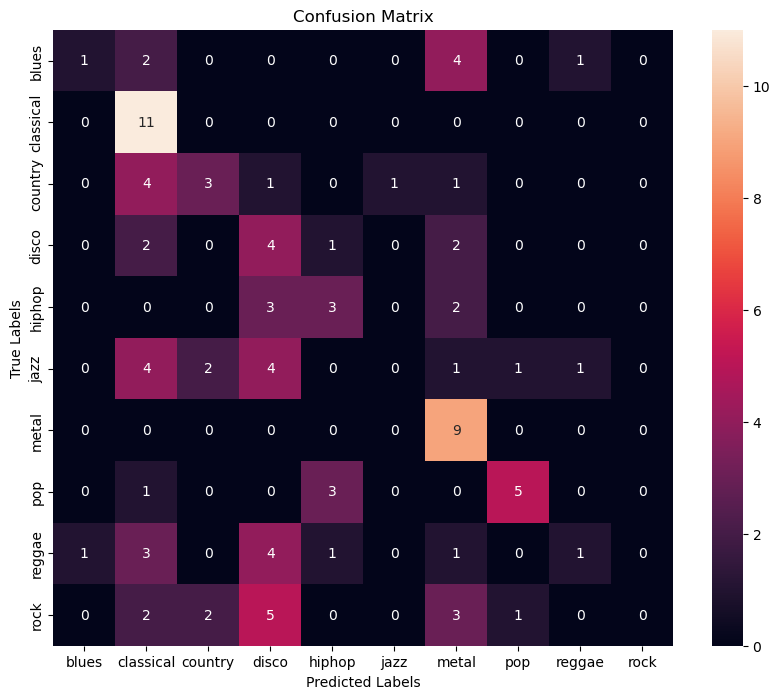

In [169]:
from torchmetrics import ConfusionMatrix
import matplotlib.pyplot as plt
import seaborn as sns

def get_confusion_matrix(model1, loader, num_classes):
    model.eval()
  
    confusion_matrix = ConfusionMatrix(num_classes=num_classes, task='multiclass')
    confusion_matrix = confusion_matrix.to('cuda') 
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            confusion_matrix.update(preds, labels)
    cm = confusion_matrix.compute()
    return cm.cpu().numpy()  #for easy use with seaborn


num_classes = 10 
model1.cuda() 

#confusion matrix
conf_matrix = get_confusion_matrix(model1, test_loader, num_classes)

#plot the confusion matrix
plt.figure(figsize=(10, 8))
music_categories = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=music_categories, yticklabels=music_categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Try to generate 1500 data

In [162]:
#150 for every categories
num_new_samples = 150

z_dim = 150

generator.eval()  #evaluation mode

num_classes = 10  
generated_spectrograms1 = []
generated_labels1 = []

for class_label in range(num_classes):
    noise = torch.randn(num_new_samples, z_dim).cuda()
    class_spectrograms1 = generator(noise).detach().cpu()
    class_labels1 = torch.full((num_new_samples,), class_label, dtype=torch.long)
    
    generated_spectrograms1.append(class_spectrograms1)
    generated_labels1.append(class_labels1)

#link all generate data
generated_spectrograms1 = torch.cat(generated_spectrograms1, dim=0)
generated_labels1 = torch.cat(generated_labels1, dim=0)

#TensorDataset
generated_dataset1 = TensorDataset(generated_spectrograms1, generated_labels1)

In [163]:
from torch.utils.data import ConcatDataset

enhanced_dataset1 = ConcatDataset([train_dataset, generated_dataset1])


enhanced_data_loader1 = DataLoader(enhanced_dataset1, batch_size=32, shuffle=True)


In [164]:
print(f"Original train dataset size: {len(train_dataset)}")
print(f"Generated dataset size: {len(generated_dataset1)}")
print(f"Enhanced dataset size: {len(enhanced_dataset1)}")

Original train dataset size: 699
Generated dataset size: 1500
Enhanced dataset size: 2199


In [166]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

class MusicGenreLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(MusicGenreLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, 
                            num_layers=num_layers, batch_first=True, dropout=dropout_rate)
        self.batch_norm = nn.BatchNorm1d(hidden_size)  #batch normalization
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(in_features=hidden_size, out_features=num_classes)
        self.relu = nn.ReLU()  #ReLU activation function

    def forward(self, x):
        x = x.squeeze(1).transpose(1, 2)  # Adjusting the input dimensions for LSTM
        _, (hn, _) = self.lstm(x)
        hn = self.relu(hn[-1, :, :])  #ReLU after LSTM
        hn = self.batch_norm(hn)  #batch normalization
        hn = self.dropout(hn)
        out = self.fc(hn)
        return out

#model2
model2 = MusicGenreLSTM(input_size=128, hidden_size=256, num_layers=2, num_classes=10, dropout_rate=0.3).cuda()

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.00005)

def calculate_accuracy(loader, model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    model.train()
    return accuracy

def train(model, train_loader, val_loader, epochs, loss_fn, optimizer):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for features, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            features, labels = features.cuda(), labels.cuda()
            optimizer.zero_grad()
            outputs = model(features)
            loss = loss_fn(outputs, labels)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            total_loss += loss.item()

      
        val_accuracy = calculate_accuracy(val_loader, model)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")


train(model2, enhanced_data_loader1, val_loader, epochs=120, loss_fn=loss_fn, optimizer=optimizer)

Epoch 1/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [1/120], Loss: 2.4052, Val Accuracy: 0.2261


Epoch 2/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [2/120], Loss: 2.3105, Val Accuracy: 0.3417


Epoch 3/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [3/120], Loss: 2.2905, Val Accuracy: 0.3015


Epoch 4/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [4/120], Loss: 2.2673, Val Accuracy: 0.2915


Epoch 5/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [5/120], Loss: 2.2555, Val Accuracy: 0.2915


Epoch 6/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [6/120], Loss: 2.2350, Val Accuracy: 0.3216


Epoch 7/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [7/120], Loss: 2.2185, Val Accuracy: 0.2915


Epoch 8/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [8/120], Loss: 2.2015, Val Accuracy: 0.3065


Epoch 9/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [9/120], Loss: 2.1965, Val Accuracy: 0.3417


Epoch 10/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [10/120], Loss: 2.1768, Val Accuracy: 0.3266


Epoch 11/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [11/120], Loss: 2.1643, Val Accuracy: 0.2965


Epoch 12/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [12/120], Loss: 2.1604, Val Accuracy: 0.3367


Epoch 13/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [13/120], Loss: 2.1671, Val Accuracy: 0.3015


Epoch 14/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [14/120], Loss: 2.1508, Val Accuracy: 0.3367


Epoch 15/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [15/120], Loss: 2.1391, Val Accuracy: 0.3467


Epoch 16/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [16/120], Loss: 2.1080, Val Accuracy: 0.3618


Epoch 17/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [17/120], Loss: 2.1024, Val Accuracy: 0.3216


Epoch 18/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [18/120], Loss: 2.1057, Val Accuracy: 0.3618


Epoch 19/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [19/120], Loss: 2.0783, Val Accuracy: 0.3618


Epoch 20/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [20/120], Loss: 2.0811, Val Accuracy: 0.3216


Epoch 21/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [21/120], Loss: 2.0527, Val Accuracy: 0.3819


Epoch 22/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [22/120], Loss: 2.0564, Val Accuracy: 0.3668


Epoch 23/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [23/120], Loss: 2.0303, Val Accuracy: 0.3819


Epoch 24/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [24/120], Loss: 2.0186, Val Accuracy: 0.4221


Epoch 25/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [25/120], Loss: 2.0242, Val Accuracy: 0.3869


Epoch 26/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [26/120], Loss: 2.0117, Val Accuracy: 0.3869


Epoch 27/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [27/120], Loss: 1.9761, Val Accuracy: 0.4221


Epoch 28/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [28/120], Loss: 1.9897, Val Accuracy: 0.4070


Epoch 29/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [29/120], Loss: 1.9896, Val Accuracy: 0.4171


Epoch 30/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [30/120], Loss: 1.9544, Val Accuracy: 0.4271


Epoch 31/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [31/120], Loss: 1.9548, Val Accuracy: 0.4070


Epoch 32/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [32/120], Loss: 1.9347, Val Accuracy: 0.3568


Epoch 33/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [33/120], Loss: 1.9485, Val Accuracy: 0.4271


Epoch 34/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [34/120], Loss: 1.9227, Val Accuracy: 0.4523


Epoch 35/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [35/120], Loss: 1.9073, Val Accuracy: 0.4070


Epoch 36/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [36/120], Loss: 1.8900, Val Accuracy: 0.4422


Epoch 37/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [37/120], Loss: 1.8823, Val Accuracy: 0.4472


Epoch 38/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [38/120], Loss: 1.8663, Val Accuracy: 0.4523


Epoch 39/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [39/120], Loss: 1.8512, Val Accuracy: 0.4774


Epoch 40/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [40/120], Loss: 1.8505, Val Accuracy: 0.4623


Epoch 41/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [41/120], Loss: 1.8406, Val Accuracy: 0.4472


Epoch 42/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [42/120], Loss: 1.8179, Val Accuracy: 0.4573


Epoch 43/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [43/120], Loss: 1.8094, Val Accuracy: 0.4472


Epoch 44/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [44/120], Loss: 1.7971, Val Accuracy: 0.4573


Epoch 45/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [45/120], Loss: 1.8120, Val Accuracy: 0.4472


Epoch 46/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [46/120], Loss: 1.7773, Val Accuracy: 0.4271


Epoch 47/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [47/120], Loss: 1.8102, Val Accuracy: 0.4221


Epoch 48/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [48/120], Loss: 1.7442, Val Accuracy: 0.4472


Epoch 49/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [49/120], Loss: 1.7523, Val Accuracy: 0.4774


Epoch 50/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [50/120], Loss: 1.7281, Val Accuracy: 0.4724


Epoch 51/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [51/120], Loss: 1.7405, Val Accuracy: 0.4322


Epoch 52/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [52/120], Loss: 1.7322, Val Accuracy: 0.4573


Epoch 53/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [53/120], Loss: 1.7225, Val Accuracy: 0.4472


Epoch 54/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [54/120], Loss: 1.6796, Val Accuracy: 0.4422


Epoch 55/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [55/120], Loss: 1.6986, Val Accuracy: 0.4472


Epoch 56/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [56/120], Loss: 1.6946, Val Accuracy: 0.4271


Epoch 57/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [57/120], Loss: 1.6498, Val Accuracy: 0.4623


Epoch 58/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [58/120], Loss: 1.6482, Val Accuracy: 0.4422


Epoch 59/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [59/120], Loss: 1.6415, Val Accuracy: 0.4472


Epoch 60/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [60/120], Loss: 1.6400, Val Accuracy: 0.4724


Epoch 61/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [61/120], Loss: 1.6133, Val Accuracy: 0.4874


Epoch 62/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [62/120], Loss: 1.6194, Val Accuracy: 0.4824


Epoch 63/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [63/120], Loss: 1.5951, Val Accuracy: 0.4422


Epoch 64/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [64/120], Loss: 1.5770, Val Accuracy: 0.4623


Epoch 65/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [65/120], Loss: 1.5602, Val Accuracy: 0.4673


Epoch 66/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [66/120], Loss: 1.5505, Val Accuracy: 0.4573


Epoch 67/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [67/120], Loss: 1.5427, Val Accuracy: 0.4472


Epoch 68/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [68/120], Loss: 1.5199, Val Accuracy: 0.4724


Epoch 69/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [69/120], Loss: 1.5203, Val Accuracy: 0.4623


Epoch 70/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [70/120], Loss: 1.5107, Val Accuracy: 0.3869


Epoch 71/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [71/120], Loss: 1.5069, Val Accuracy: 0.4372


Epoch 72/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [72/120], Loss: 1.4915, Val Accuracy: 0.4171


Epoch 73/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [73/120], Loss: 1.4804, Val Accuracy: 0.4824


Epoch 74/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [74/120], Loss: 1.4537, Val Accuracy: 0.4523


Epoch 75/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [75/120], Loss: 1.4392, Val Accuracy: 0.4573


Epoch 76/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [76/120], Loss: 1.4484, Val Accuracy: 0.4221


Epoch 77/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [77/120], Loss: 1.4215, Val Accuracy: 0.4523


Epoch 78/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [78/120], Loss: 1.4132, Val Accuracy: 0.4824


Epoch 79/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [79/120], Loss: 1.4304, Val Accuracy: 0.4372


Epoch 80/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [80/120], Loss: 1.4052, Val Accuracy: 0.4724


Epoch 81/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [81/120], Loss: 1.4059, Val Accuracy: 0.4724


Epoch 82/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [82/120], Loss: 1.4031, Val Accuracy: 0.4925


Epoch 83/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [83/120], Loss: 1.3653, Val Accuracy: 0.4472


Epoch 84/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [84/120], Loss: 1.3521, Val Accuracy: 0.4020


Epoch 85/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [85/120], Loss: 1.3460, Val Accuracy: 0.4925


Epoch 86/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [86/120], Loss: 1.3238, Val Accuracy: 0.4523


Epoch 87/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [87/120], Loss: 1.3077, Val Accuracy: 0.4573


Epoch 88/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [88/120], Loss: 1.2993, Val Accuracy: 0.4372


Epoch 89/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [89/120], Loss: 1.2855, Val Accuracy: 0.4774


Epoch 90/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [90/120], Loss: 1.2756, Val Accuracy: 0.4623


Epoch 91/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [91/120], Loss: 1.2610, Val Accuracy: 0.4573


Epoch 92/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [92/120], Loss: 1.2499, Val Accuracy: 0.4523


Epoch 93/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [93/120], Loss: 1.2306, Val Accuracy: 0.4422


Epoch 94/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [94/120], Loss: 1.2246, Val Accuracy: 0.4271


Epoch 95/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [95/120], Loss: 1.2164, Val Accuracy: 0.4372


Epoch 96/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [96/120], Loss: 1.2088, Val Accuracy: 0.4070


Epoch 97/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [97/120], Loss: 1.1768, Val Accuracy: 0.4472


Epoch 98/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [98/120], Loss: 1.1490, Val Accuracy: 0.4874


Epoch 99/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [99/120], Loss: 1.1628, Val Accuracy: 0.4472


Epoch 100/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [100/120], Loss: 1.1304, Val Accuracy: 0.4673


Epoch 101/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [101/120], Loss: 1.1109, Val Accuracy: 0.4673


Epoch 102/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [102/120], Loss: 1.1166, Val Accuracy: 0.4724


Epoch 103/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [103/120], Loss: 1.0854, Val Accuracy: 0.4472


Epoch 104/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [104/120], Loss: 1.1023, Val Accuracy: 0.4623


Epoch 105/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [105/120], Loss: 1.0720, Val Accuracy: 0.4724


Epoch 106/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [106/120], Loss: 1.0469, Val Accuracy: 0.4422


Epoch 107/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [107/120], Loss: 1.0499, Val Accuracy: 0.4673


Epoch 108/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [108/120], Loss: 1.0391, Val Accuracy: 0.4623


Epoch 109/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [109/120], Loss: 0.9986, Val Accuracy: 0.4623


Epoch 110/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [110/120], Loss: 0.9943, Val Accuracy: 0.4573


Epoch 111/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [111/120], Loss: 0.9851, Val Accuracy: 0.4673


Epoch 112/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [112/120], Loss: 0.9869, Val Accuracy: 0.5075


Epoch 113/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [113/120], Loss: 0.9825, Val Accuracy: 0.4824


Epoch 114/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [114/120], Loss: 0.9610, Val Accuracy: 0.4523


Epoch 115/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [115/120], Loss: 0.9434, Val Accuracy: 0.4523


Epoch 116/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [116/120], Loss: 0.9247, Val Accuracy: 0.4774


Epoch 117/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [117/120], Loss: 0.9153, Val Accuracy: 0.4573


Epoch 118/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [118/120], Loss: 0.8793, Val Accuracy: 0.4573


Epoch 119/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [119/120], Loss: 0.8835, Val Accuracy: 0.4975


Epoch 120/120:   0%|          | 0/69 [00:00<?, ?it/s]

Epoch [120/120], Loss: 0.8750, Val Accuracy: 0.4774


In [170]:
def test_model(model, test_loader):
    model.eval()  #evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.cuda(), labels.cuda()
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_accuracy = correct / total
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy

test_accuracy = test_model(model2, test_loader)

Test Accuracy: 0.5149
